# DSC 540-Week 9 & 10 Exercises

# Acticvity 9

In [1]:
## Loading libraries
import urllib.request, urllib.parse, urllib.error

import requests

from bs4 import BeautifulSoup

import ssl

import re

In [2]:
## Checking SSl certificate
# Ignore SSL certificate errors

ctx = ssl.create_default_context()

ctx.check_hostname = False

ctx.verify_mode = ssl.CERT_NONE

In [3]:
# Read the HTML from the URL and pass on to BeautifulSoup

top100url = 'https://www.gutenberg.org/browse/scores/top'

response = requests.get(top100url)

In [4]:
## Checking the status of the web request
def status_check(r):
    if r.status_code==200:
        print('Success!')
        return 1
    else:
        print('Failed!')
        return -1

In [5]:
## checking status response
status_check(response)


Success!


1

In [6]:
## decoding response and and passing it on beautifulsoup

contents = response.content.decode(response.encoding)

soup = BeautifulSoup(contents, 'html.parser')

In [7]:
## finding all link tags (href)
# Empty list to hold all the http links in the HTML page

lst_links=[]

# Find all the href tags and store them in the list of links

for link in soup.find_all('a'):
    lst_links.append(link.get('href'))
## print all the links
lst_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [8]:
## finding numeric digits in the links
booknum=[]
for i in range(19,119):
    link=lst_links[i]
    link=link.strip()
# Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer

        booknum.append(int(n[0]))

## Printing the file numbers
print ('\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n'+'-'*70)

## print the numbers
print(booknum)




The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 1342, 84, 4980, 11, 2701, 345, 1661, 46, 25344, 174, 32992, 63256, 98, 66676, 1260, 64317, 5200, 844, 219, 66677, 2542, 1232, 43, 205, 1080, 1250, 2591, 76, 2554, 1952, 6130, 2600, 16, 5740, 41, 4300, 158, 1184, 514, 66680, 74, 1727, 55, 66679, 58585, 2814, 32449, 23, 1400, 408, 996, 160, 45, 28054, 30254, 1497, 7370, 4363, 16328, 8492, 2852, 768, 36, 203, 3600, 27827, 135, 120, 902, 244, 1998, 3207, 2148, 215, 5739, 10007, 1399, 66674, 730, 66671, 42884, 521, 10, 829, 766, 66678]


In [9]:
## What does the soup object's text look like
print(soup.text[:2000])

if (top != self):
    top.location.replace("http://www.gutenberg.org")
    alert('Project Gutenberg is a FREE service with NO membership required. If you paid somebody else to get here,make them give you your money back!')






Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2021-11-06139952
last 7 days1175286
last 30 days4916828



Top 100 EBooks yesterd

NameError: name 'top' is not defined

In [12]:
## Search in the extracted text
# Temp empty list of Ebook names

lst_titles_temp=[]
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+9+i])

lst_titles=[]

for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

for l in lst_titles:
    print(l)


Pride and Prejudice by Jane Austen 
Frankenstein
Old Granny Fox by Thornton W
Alice
Moby Dick
Dracula by Bram Stoker 
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
A Christmas Carol in Prose
The Scarlet Letter by Nathaniel Hawthorne 
The Picture of Dorian Gray by Oscar Wilde 
The Youngest Girl in the School by Evelyn Sharp 
The American Diary of a Japanese Girl by Yon
A Tale of Two Cities by Charles Dickens 
The King of the Mamozekel by Sir Charles G
Jane Eyre
The Great Gatsby by F
Metamorphosis by Franz Kafka 
The Importance of Being Earnest
Heart of Darkness by Joseph Conrad 
The Adventures of Gil Blas of Santillane
A Doll
The Prince by Niccol
The Strange Case of Dr
Walden
A Modest Proposal by Jonathan Swift 
Anthem by Ayn Rand 
Grimms
Adventures of Huckleberry Finn by Mark Twain 
Crime and Punishment by Fyodor Dostoyevsky 
The Yellow Wallpaper by Charlotte Perkins Gilman 
The Iliad by Homer 
War and Peace by graf Leo Tolstoy 
Peter Pan by J
Tractatus Logico
The Legend of

# Activity 10


In [42]:
## importing modules
import urllib.request, urllib.parse, urllib.error

import json

In [43]:
with open('APIkey.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [44]:
## assigning the url
serviceurl = 'http://www.omdbapi.com/?'

In [45]:
## creating a variable called apikey
apikey = '&apikey='+omdbapi

In [52]:

#7: Writing a utility function called print_json to print the movie data from a JSON file

def print_json(json_file):
    #List of the categories in the JSON files returned by the OMDb API
    json_categories = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 
                 'Language', 'Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    
    #Iterating over the list to print each category followed by its value from the JSON file
    for k in json_categories:
        print(f'{k} : {json_file[k]}')

In [53]:
import os

#Function to download the poster
def download_poster(json_file):
    #Pulling the movie title and poster link from the JSON file
    title = str(json_file['Title'])
    poster_link = json_file['Poster']
    
    #Reading the poster image data by passing the poster link through the urllib.request library
    poster = UR.urlopen(poster_link).read()
    
    #Defining the image file's save location in the current working directory
    save_location = os.getcwd() + '\\'
    
    #Getting the file extension from the poster URL by grabbing the last value from the URL split by its dots
    #Usually images will end in '.JPEG' or '.PNG' so the last set of characters after the last dot should be the extension.
    poster_file_extension = poster_link.split('.')[-1]
    
    #If the file extension is one of the most common image extensions, the file will be downloaded
    if poster_file_extension.upper() == 'JPEG' or poster_file_extension.upper() == 'JPG' or poster_file_extension.upper() == 'PNG':
        #Defining what the saved file will be named
        filename = '{}{}{}{}'.format(save_location, title, '.', poster_file_extension)

        #Opening a brand new file, writing the image data to it, then closing it
        with open(filename,'wb') as f:
            f.write(poster)
            f.close()

In [54]:
## utility function for searching
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of {title} now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie

        if json_data['Poster']!='N/A':
            save_poster(json_data)
        else:
            print('Error encountered: ',json_data['Error'])

    except urllib.error.URLError as e:
        print(f'ERROR: {e.reason}')

In [57]:
#Writing a function to display the downloaded poster directly in Jupyter Notebook.

def show_image(movie_name):
    try:
        from IPython.display import Image, display
        display(Image(filename = '{}.jpg'.format(movie_name)))
    except:
        print('ERROR!')

Retrieving the data of Titanic now... 
http://www.omdbapi.com/?t=Titanic&apikey=cd4d1cd1
Title : Titanic
Year : 1997
Rated : PG-13
Released : 19 Dec 1997
Runtime : 194 min
Genre : Drama, Romance
Director : James Cameron
Writer : James Cameron
Actors : Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates
Plot : A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language : English, Swedish, Italian, French
Country : USA, Mexico, Australia, Canada
Awards : Won 11 Oscars. Another 114 wins & 83 nominations.
Ratings : [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore : 75
imdbRating : 7.8
imdbVotes : 1,060,049
imdbID : tt0120338


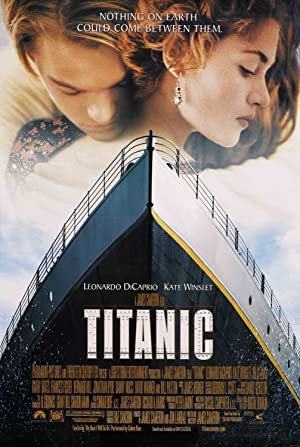

In [58]:

#Testing the functions on the movie Titanic
titanic = 'Titanic'
search_movie(titanic)
show_image(titanic)
print(' ')

#Testing to see if an error occurs
#search_movie('No Movie Found')
show_image('No Movie Found')

In [61]:
# Import the Twython class
from twython import Twython
import json

# Load credentials from json file
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)

# Instantiate an object
python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])

# Create our query
query1 = {'q': 'Bellevue University',
        'result_type': 'recent',
         'count': '100',
        'lang': 'en',
        }
query2 = {'q': 'Data Science',
        'result_type': 'recent',
         'count': '100',
        'lang': 'en',
        }

In [64]:
import pandas as pd

# Search tweets
dict_ = {'user': [], 'date': [], 'text': [], 'favorite_count': []}
for status in python_tweets.search(**query1)['statuses']:
    dict_['user'].append(status['user']['screen_name'])
    dict_['date'].append(status['created_at'])
    dict_['text'].append(status['text'])
    dict_['favorite_count'].append(status['favorite_count'])

# Structure data in a pandas DataFrame for easier manipulation
df = pd.DataFrame(dict_)
df.sort_values(by='favorite_count', inplace=True, ascending=False)
df

,user,date,text,favorite_count
20,jamison_gruber,Sat May 15 17:35:58 +0000 2021,Blessed to receive an offer from Bellevue Univ...,116
32,ChieftainNation,Wed May 12 17:47:16 +0000 2021,Congratulations to Sarah Felten for signing wi...,28
1,JournalHardin,Sun May 16 20:01:10 +0000 2021,Plattsmouth graduates Chris Casart and Cole Wa...,9
5,BellevueU,Sun May 16 17:00:56 +0000 2021,The Bellevue University campus is in full bloo...,8
2,JournalHardin,Sun May 16 19:58:14 +0000 2021,Conestoga graduate Jenna Curtis played in four...,7
28,Okotoks_Dawgs,Thu May 13 18:00:14 +0000 2021,Dawgs WCBL RHP Corey Jackson has been an absol...,7
36,ksidzyik,Tue May 11 19:55:00 +0000 2021,I love seeing @BellevueU students do cool thin...,6
42,BellevueLeader,Tue May 11 06:20:12 +0000 2021,It is not too often that an undergraduate rese...,3
26,corporatelearn,Thu May 13 20:00:56 +0000 2021,"Bellevue University, along with 22 other insti...",3
3,JournalHardin,Sun May 16 19:56:57 +0000 2021,Plattsmouth graduate Sydni Haugaard played in ...,3


In [67]:
dict_ = {'user': [], 'date': [], 'text': [], 'favorite_count': []}
for status in python_tweets.search(**query2)['statuses']:
    dict_['user'].append(status['user']['screen_name'])
    dict_['date'].append(status['created_at'])
    dict_['text'].append(status['text'])
    dict_['favorite_count'].append(status['favorite_count'])

# Structure data in a pandas DataFrame for easier manipulation
df1 = pd.DataFrame(dict_)
df1.sort_values(by='favorite_count', inplace=True, ascending=False)
df1

,user,date,text,favorite_count
99,MaxRLambert,Tue May 18 01:57:50 +0000 2021,We made the front page of the @scsentinel!\n\n...,14
50,alibaba_cloud,Tue May 18 02:10:00 +0000 2021,#BREAKING #AlibabaCloud's self-developed cloud...,4
53,AgentW45,Tue May 18 02:09:21 +0000 2021,@neontaster Am I the only one that reads that ...,3
23,ifihadastick,Tue May 18 02:15:45 +0000 2021,"At the end of April, I had 65% of Population I...",3
65,pam_pinklady,Tue May 18 02:06:53 +0000 2021,RT @libertytarian: #Fauci &amp; #CDC say vacci...,0
...,...,...,...,...
33,help_academia,Tue May 18 02:12:45 +0000 2021,Hire us to help you with your coursework\nFina...,0
32,SUPERIORWRITE17,Tue May 18 02:13:01 +0000 2021,Let The Prophesionals Handle Your;\nPowerPoint...,0
31,ProminentTutors,Tue May 18 02:13:11 +0000 2021,Hire us to help you with your coursework\nFina...,0
30,DigitalPatriot0,Tue May 18 02:13:13 +0000 2021,RT @gamesblazer06: This is when you know Masks...,0


## Exercise 4

In [104]:
## load packages
import pandas as pd
import seaborn as sns

In [107]:
## import data and apply cleansing rules
carPriceData = pd.read_csv('C:/Users/Supraja/Desktop/5. DSC540/Project Submission/project_data/CarPrice_Assignment.csv') 
carPriceData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<AxesSubplot:xlabel='wheelbase', ylabel='enginesize'>

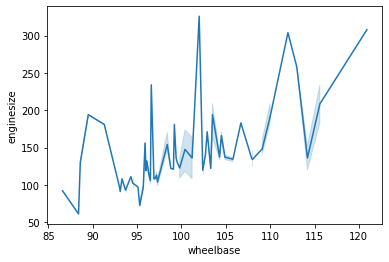

In [108]:
## line chart
sns.lineplot(data=carPriceData, x="wheelbase", y="enginesize")

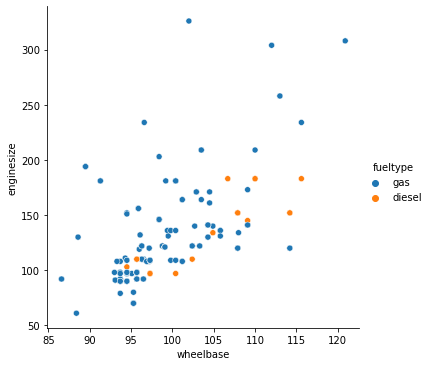

In [109]:
## scatter plot
sns.relplot(data=carPriceData, x='wheelbase', y='enginesize',
hue='fueltype')

<AxesSubplot:xlabel='wheelbase', ylabel='carbody'>

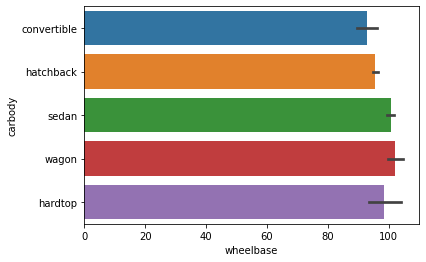

In [110]:
## bar chart
sns.barplot(x="wheelbase", y="carbody", data=carPriceData)

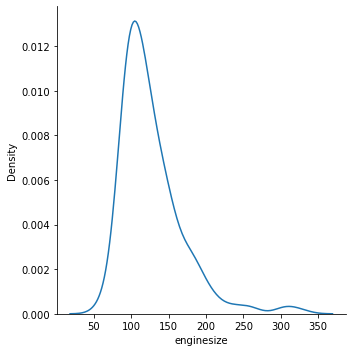

In [111]:
## Density plot
sns.displot(data=carPriceData, x='enginesize', kind='kde')

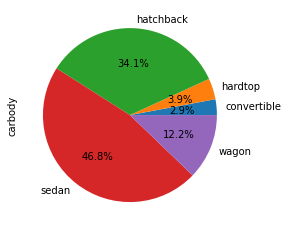

In [112]:
## pie chart
data = carPriceData.groupby("carbody")["carbody"].count()
data.plot.pie(autopct="%.1f%%");
